In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

In [2]:
plt.rcParams['figure.figsize'] = [16,12]

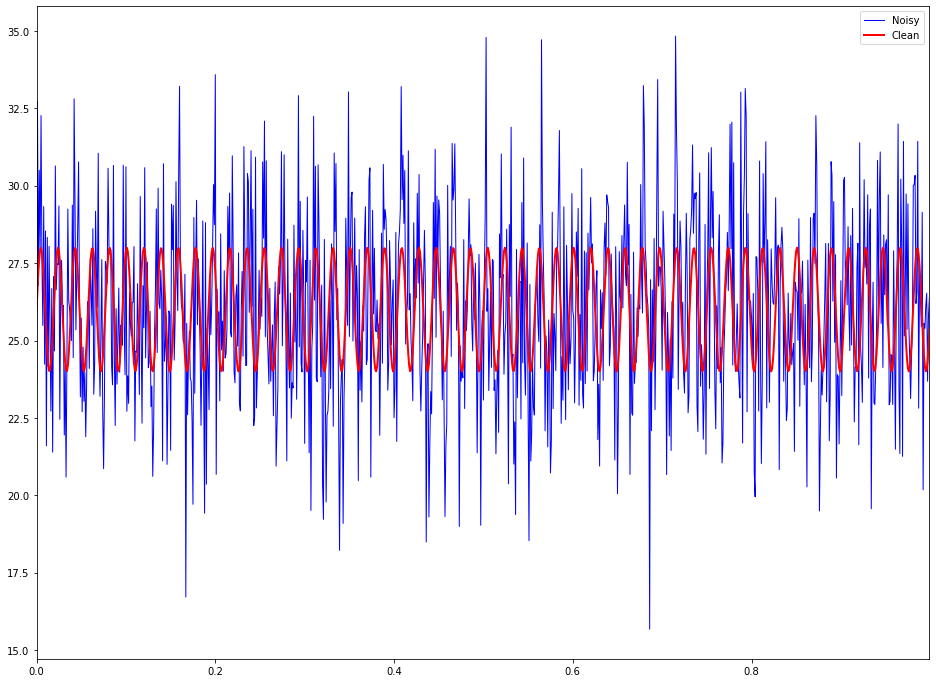

In [3]:
N = 1000 # number of sample points
sf = 1000 # 1000Hz sampling frequency
T = 1.0/sf
x = np.linspace(0.0, N*T, N, endpoint=False)
y_clean = 26 + 2.0 * np.sin(52*2.0*np.pi*x)
y_noise = y_clean + 2.5*np.random.randn(N)
# y_noise = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

plt.plot(x, y_noise, color='b', LineWidth=1, label='Noisy')
plt.plot(x, y_clean, color='r', LineWidth=2, label='Clean')
plt.xlim(x[0],x[-1])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


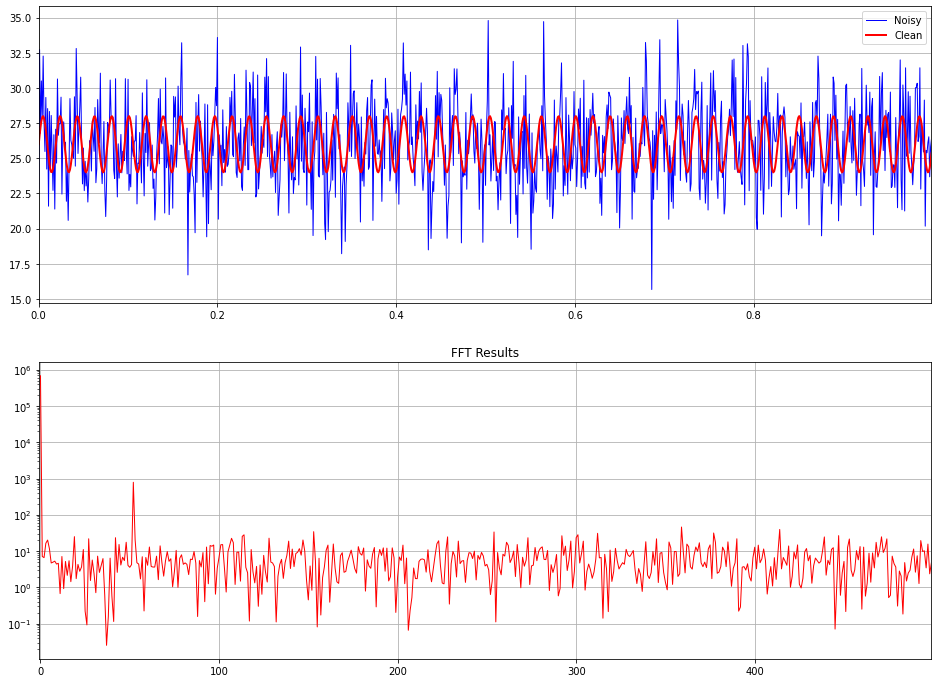

In [28]:
yhat_sc = fft.fft(y_noise)
yhat_np = np.fft.fft(y_noise)
PSD = yhat_np * np.conj(yhat_np) / N
xf = fft.fftfreq(N,T)
# to discard showing dominant signal set L from 1 to N/2 and disable log y-axis
L = np.arange(0,np.floor(N/2),dtype='int')

fig,ax = plt.subplots(2,1)

plt.sca(ax[0])

plt.plot(x, y_noise, color='b', LineWidth=1, label='Noisy')
plt.plot(x, y_clean, color='r', LineWidth=2, label='Clean')
plt.xlim(x[0],x[-1])
plt.legend()
plt.grid()

plt.sca(ax[1])
#plt.plot(xf[L],np.abs(yhat_sc[L]), color='b', LineWidth=2, label='Scipy')
plt.plot(xf[L],PSD[L], color='r', LineWidth=1, label='Numpy')
plt.title('FFT Results')
ax[1].set_yscale('log')
plt.xlim(-1, xf[L[-1]])
plt.grid()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


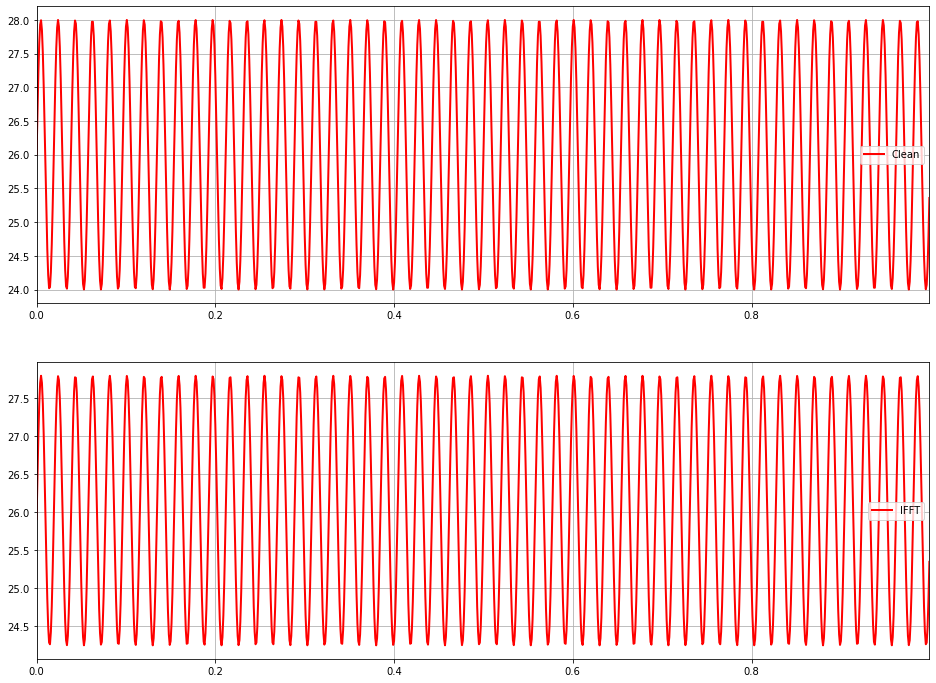

In [12]:
indices = PSD > 100
yhat_clean = indices * yhat_np
ffilt_np = np.fft.ifft(yhat_clean)

fig,ax = plt.subplots(2,1)

plt.sca(ax[0])
plt.plot(x, y_clean, color='r', LineWidth=2, label='Clean')
plt.xlim(x[0],x[-1])
plt.legend()
plt.grid()

plt.sca(ax[1])
plt.plot(x, ffilt_np, color='r', LineWidth=2, label='IFFT')
plt.xlim(x[0],x[-1])
plt.legend()
plt.grid()